Density operators are matrices that represent the probabilities of a mixed state, i.e., what the probability is that a mixed state actually exists in a pure state. 

Two conditions for a matrix to be a density matrix is that it must be a positive operator, and that it's trace must be 1 (Sum of probabilities)

Let's use the trace property first. We have that 

\begin{align*}
    1 &= \textrm{tr}(\mathcal{E}(\rho))\\
    &= \textrm{tr}\left(\sum_k E_k \rho E_k^{\dagger} \right) \\
    &= \textrm{tr}\left(\sum_k E_k^{\dagger} E_k \rho \right) \quad (\text{Cyclic permutations preserve traces})
\end{align*}

If this is true for all $\rho$, and since $\textrm{tr}{\rho}$ is already 1, the only way for the equation to hold is if $$\left(\sum_k E_k^{\dagger} E_k \right) = I$$

As for positiveness, it suffices to sandwich $\mathcal{E}(\rho)$ with an arbitrary bra vector and another arbitrary ket vector, and prove that the value will always be $\geq 0$. Let me demonstrate : 

We know that $\langle \varphi | \rho | \varphi \rangle \geq 0$ since density matrices are positive definite. Replacing $\mid \varphi \rangle$ by $E_i |\psi \rangle$ (Since $E_i^{\dagger}$ is a unitary matrix and it preserves inner products and since $\varphi$ itself was arbitrary, $\psi$ is also arbitrary) So,

\begin{align*}
     \sum_k \langle \varphi | \rho | \varphi \rangle &\geq 0 \\
     \sum_k \langle \psi E_k| \rho |E_k \psi \rangle &\geq 0 \qquad (\text{Replacing }|\varphi \rangle \text{ by } E_i |\psi \rangle) \\
     \sum_k \langle \psi |E_k^{\dagger} \rho E_k |\psi \rangle &\geq 0
\end{align*}

Which means it is positive semidefinite. 

Therefore, the only condition is $$\left(\sum_k E_k^{\dagger} E_k \right) = I$$

In [1]:
import numpy as np
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex
from math import sqrt, pi
from IPython.display import display, Math
import qiskit.quantum_info as qi

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

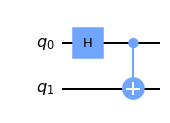

In [2]:
#Partial Tracing
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))
qc_AB.draw('mpl')

In [3]:
import matplotlib.pyplot as plt

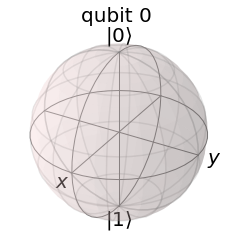

In [9]:
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
(plot_bloch_multivector(rho_B.data))

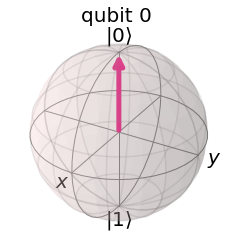

In [7]:
(plot_bloch_multivector(np.array([[1,0],[0,0]])))

The mixed state, in this case, is represented in the Bloch Sphere by 0, since it should be represented as

$$\frac{1}{2}\left(\hat{I} + \vec{r}\cdot \hat{\vec{\sigma}} \right)$$ and since the state itself is $I/2$, $\vec{r}$ is 0.

### von Neumann Entropy

Pure states have 0 von Neumann Entropy, whereas by the formula for the entropy it's clear that the entropy for the final state is $\log_2(2) = 1$. Therefore, the difference is negative.

The relation with entanglement is that the conditional entropy $S(B|A) = S(B,A) - S(A) = -1 < 0$, for A and B being the two qubits above. This means that the quantum state $AB$ is entangled (by an exercise in QCQI)

In [25]:
import matplotlib

p =  -1.0
p =  -0.75
p =  -0.5
p =  -0.25
p =  0.0
p =  0.25
p =  0.5
p =  0.75
p =  1.0



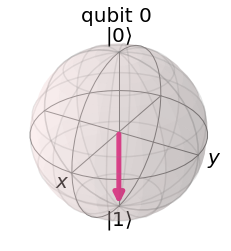

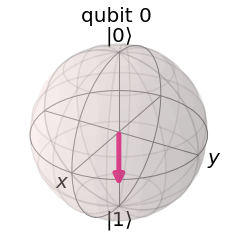

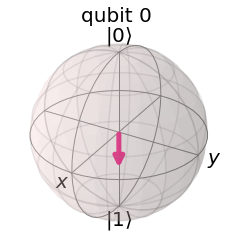

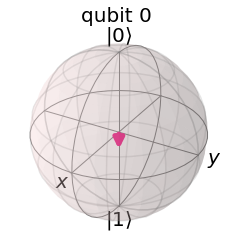

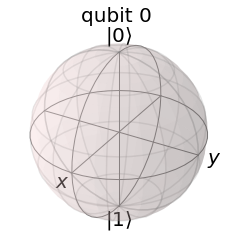

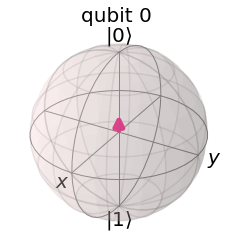

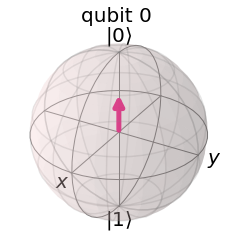

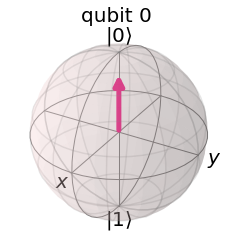

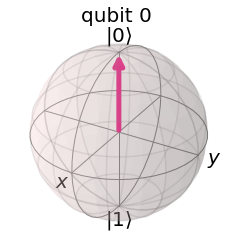

In [43]:
def fn(p):
    rho_matrix = np.array([[(1+p)/2,0],[0,(1-p)/2]])
    rho_p = qi.DensityMatrix(rho_matrix)
    return plot_bloch_multivector(rho_p.data)
for i in np.linspace(-1,1,9):
    print("p = ",i)
    matplotlib.pyplot.figure(fn(i))
print()